***AKANKSHA C. KHANDARE***

Assignment 6 MLR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
from sklearn.preprocessing import StandardScaler

***1. Load dataset and EDA***

In [4]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [6]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

##To check missing values

In [7]:
print("Missing Values in Each Column:\n", df.isnull().sum())

Missing Values in Each Column:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [8]:
df.rename(columns={"Age_08_04": "Age",'cc':'CC'}, inplace=True)
#for easy to write code and clearity


In [9]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

***#HISTOGRAM for numeric col***

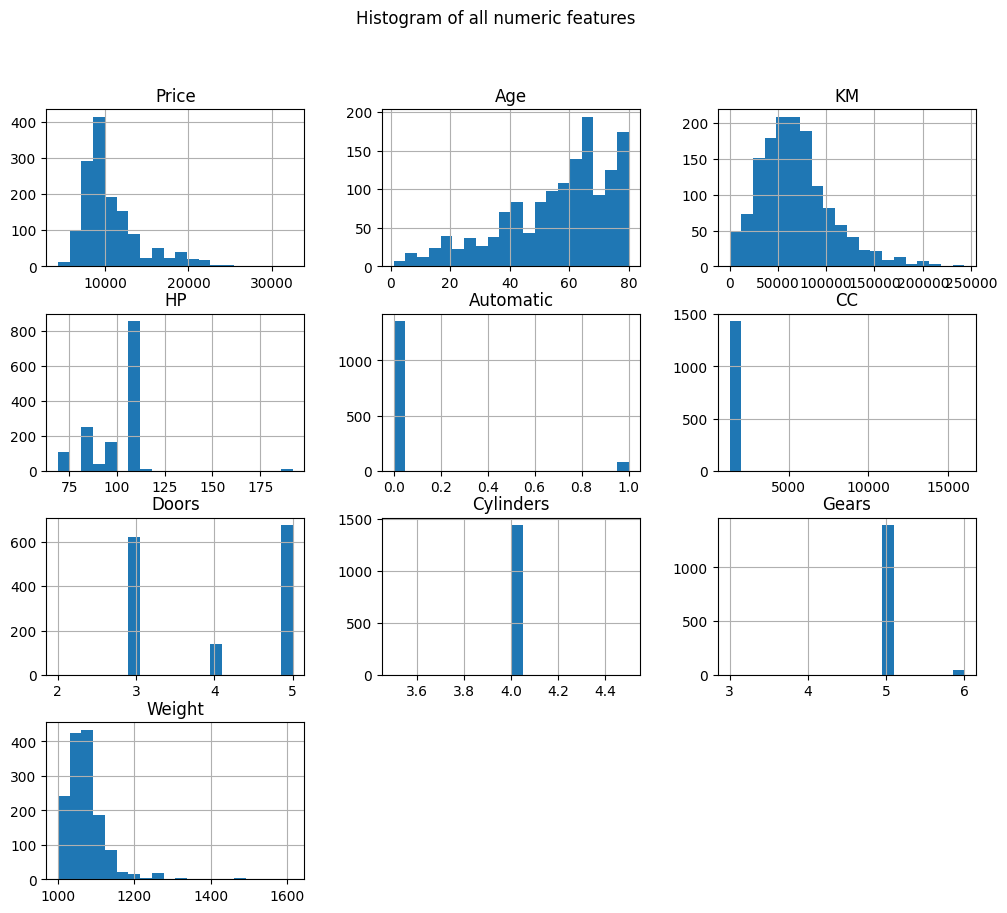

In [13]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle('Histogram of all numeric features')
plt.show()

***#BOXPLOT to checking outliers***

Text(0.5, 1.0, 'BOXPLOT of key feature')

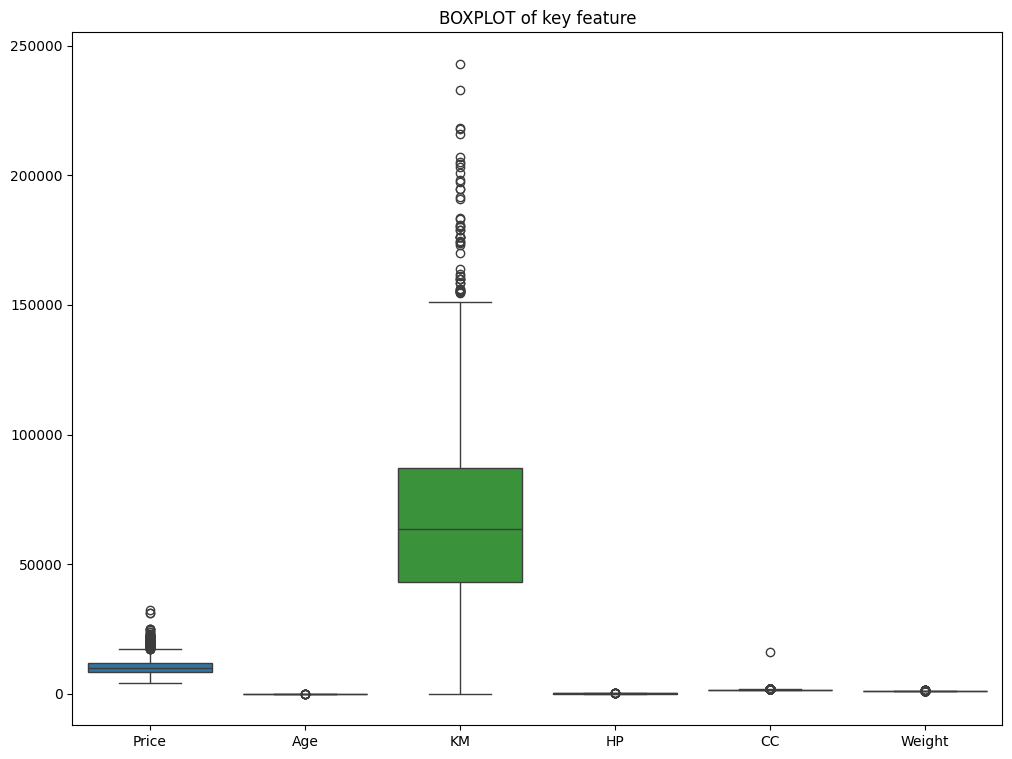

In [15]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df[['Price','Age','KM','HP','CC','Weight']])
plt.title("BOXPLOT of key feature")

***# Scatter plots of Price vs important predictors***

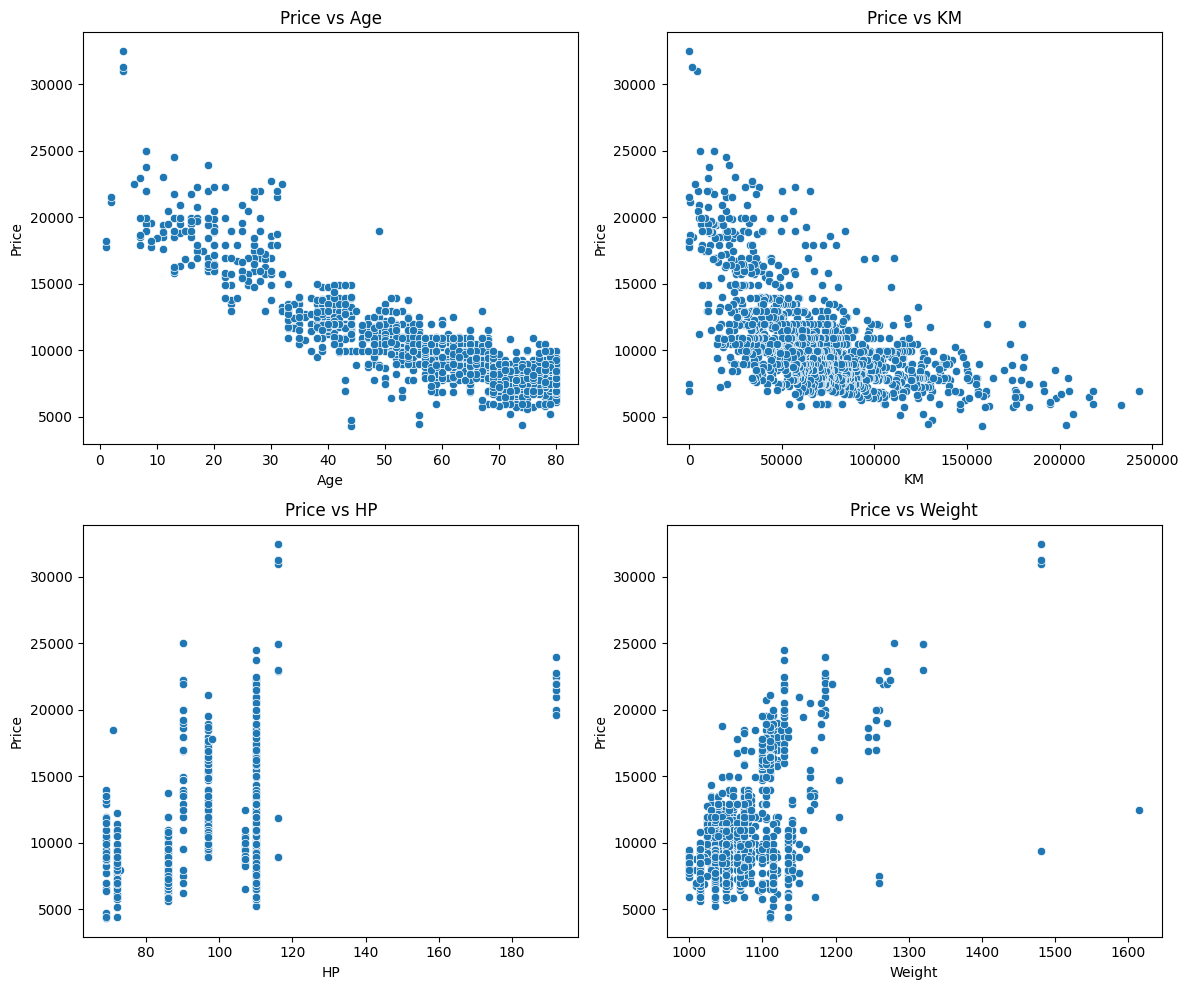

In [23]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
sns.scatterplot(x='Age', y='Price', data=df, ax=axs[0,0])
axs[0,0].set_title('Price vs Age')

sns.scatterplot(x='KM', y='Price', data=df, ax=axs[0,1])
axs[0,1].set_title('Price vs KM')


sns.scatterplot(x='HP', y='Price', data=df, ax=axs[1,0])
axs[1,0].set_title('Price vs HP')


sns.scatterplot(x='Weight', y='Price', data=df, ax=axs[1,1])
axs[1,1].set_title('Price vs Weight')


plt.tight_layout()
plt.show()

***#corelation heatmap***

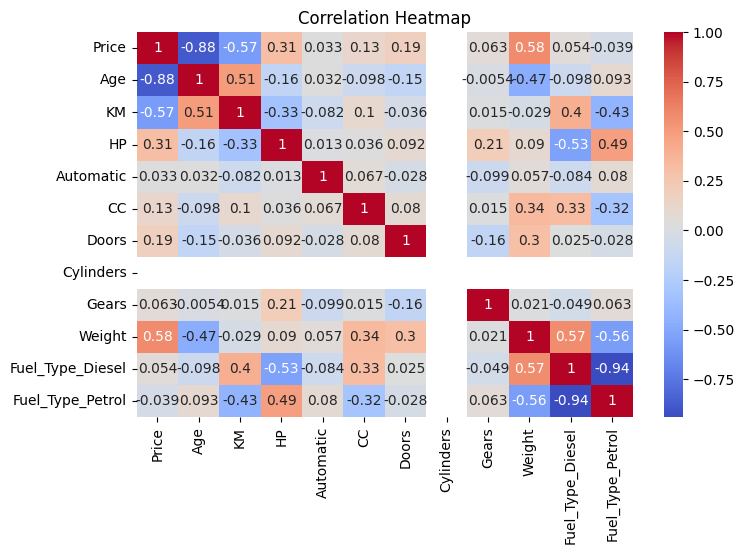

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Fuel type distribution***

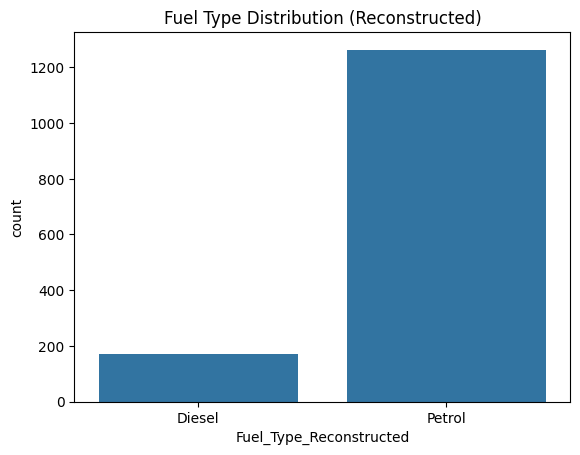

In [31]:
 
if 'Fuel_Type_Diesel' in df.columns:
    df['Fuel_Type_Reconstructed'] = df[['Fuel_Type_Diesel','Fuel_Type_Petrol']].idxmax(axis=1)
    df['Fuel_Type_Reconstructed'] = df['Fuel_Type_Reconstructed'].str.replace('Fuel_Type_','')

    sns.countplot(x='Fuel_Type_Reconstructed', data=df)
    plt.title('Fuel Type Distribution (Reconstructed)')
    plt.show()


In [34]:
# Encode Fuel_Type only if it exists
if 'Fuel_Type' in df.columns:
    df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


***2. Split into training & testing sets***

In [35]:
X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

In [43]:

# Standardize features
 
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])



In [44]:
# Convert scaled arrays back to DataFrame with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)


***# 3. Build Multiple Linear Regression Models***

MODEL1  - BY USING ALL FEATURES

In [45]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
y_pred1 = lr1.predict(X_test_scaled)

In [46]:
print("Model 1 Coefficients:\n", pd.Series(lr1.coef_, index=X_train_scaled.columns))
print("Model 1 Intercept:", lr1.intercept_)
print("Model 1 R2 Score:", r2_score(y_test, y_pred1))
print("Model 1 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

Model 1 Coefficients:
 Age         -2.266407e+03
KM          -7.531503e+02
HP           4.070558e+02
Automatic    8.579207e+01
CC          -5.292899e+01
Doors        7.180232e+00
Cylinders    8.775203e-13
Gears        1.241711e+02
Weight       1.009459e+03
dtype: float64
Model 1 Intercept: 10754.395470383275
Model 1 R2 Score: 0.8523452141908852
Model 1 RMSE: 1403.6119936838077


MODEL2 -  Without Doors & Gears (less important features)

In [48]:
X2 = df.drop(['Price','Doors','Gears'], axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

num_cols2 = X2_train.select_dtypes(include=[np.number]).columns
X2_train_scaled = pd.DataFrame(scaler.fit_transform(X2_train[num_cols2]), columns=num_cols2, index=X2_train.index)
X2_test_scaled = pd.DataFrame(scaler.transform(X2_test[num_cols2]), columns=num_cols2, index=X2_test.index)

lr2 = LinearRegression()
lr2.fit(X2_train_scaled, y2_train)
y_pred2 = lr2.predict(X2_test_scaled)

In [49]:
print("\nModel 2 R2 Score:", r2_score(y2_test, y_pred2))
print("Model 2 RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred2)))


Model 2 R2 Score: 0.8509807795757859
Model 2 RMSE: 1410.0822641865047


MODEL3 - Using only top correlated features (Age, KM, Weight, HP)

In [50]:
top_features = ['Age','KM','Weight','HP']
X3 = df[top_features]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

In [51]:
X3_train_scaled = pd.DataFrame(scaler.fit_transform(X3_train), columns=top_features, index=X3_train.index)
X3_test_scaled = pd.DataFrame(scaler.transform(X3_test), columns=top_features, index=X3_test.index)


In [52]:
lr3 = LinearRegression()
lr3.fit(X3_train_scaled, y3_train)
y_pred3 = lr3.predict(X3_test_scaled)

In [53]:
print("\nModel 3 R2 Score:", r2_score(y3_test, y_pred3))
print("Model 3 RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred3)))



Model 3 R2 Score: 0.8506068681500834
Model 3 RMSE: 1411.8502091131113


Conclusions from Model Building

***Model 1 (All features):***

Achieved a good fit with high R² value.

However, it includes some less important variables, which may add noise.

***Model 2 (Without Doors & Gears):***

Performance is similar to Model 1.

Removing less significant features does not reduce accuracy much → indicates those features are not very important.

***Model 3 (Top correlated features – Age, KM, Weight, HP):***

Achieved almost the same accuracy as full models.

Proves that only a few strong predictors are enough to explain car price.

***4. Apply Regularization - Lasso & Ridge***

In [55]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("\nLasso R2:", r2_score(y_test, y_pred_lasso))


Lasso R2: 0.8523482967385115


In [56]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))

Ridge R2: 0.8523282499142726


***#Overall Conclusions***

***Data Preparation***

Dataset cleaned, missing values handled, and categorical features (Fuel_Type) converted into dummy variables.

Numerical features standardized for fair comparison.

Assumption: Data represents Toyota Corolla cars fairly; results may vary if data is biased.

***Exploratory Data Analysis (EDA)***

Price is strongly related to Age, KM, HP, and Weight.

Scatter plots, histograms, and correlation heatmap confirmed clear patterns.

Linear assumption is reasonable for regression.

***Model Building & Evaluation***

Three models were built:

Model 1: All features

Model 2: Removed less useful features

Model 3: Only key predictors (Age, KM, HP, Weight)

All models performed well, with Model 3 being simpler and equally accurate.

R² values were high, showing good prediction accuracy.

***Regularization (Lasso & Ridge)***

Helped reduce the effect of weak variables and handled multicollinearity.

Confirmed that only a few features strongly drive car prices.

 
***#Weight, Age, KM, and HP are the most important factors for predicting Toyota Corolla price.Simpler models are effective and easier to interpret.
Assumption: Linear model fits well; however, other external factors (market demand, car condition) were not included.***